In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
movies_df = pd.read_csv('data/movies_complete.csv', parse_dates=['release_date'])

In [3]:
movies_df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,1.00,4.00,0.07,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.00,9.00,0.18,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.00,3.80,0.90,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.00,NaN,0.00,87.00,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


Dataset Features:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [6]:
movies_df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


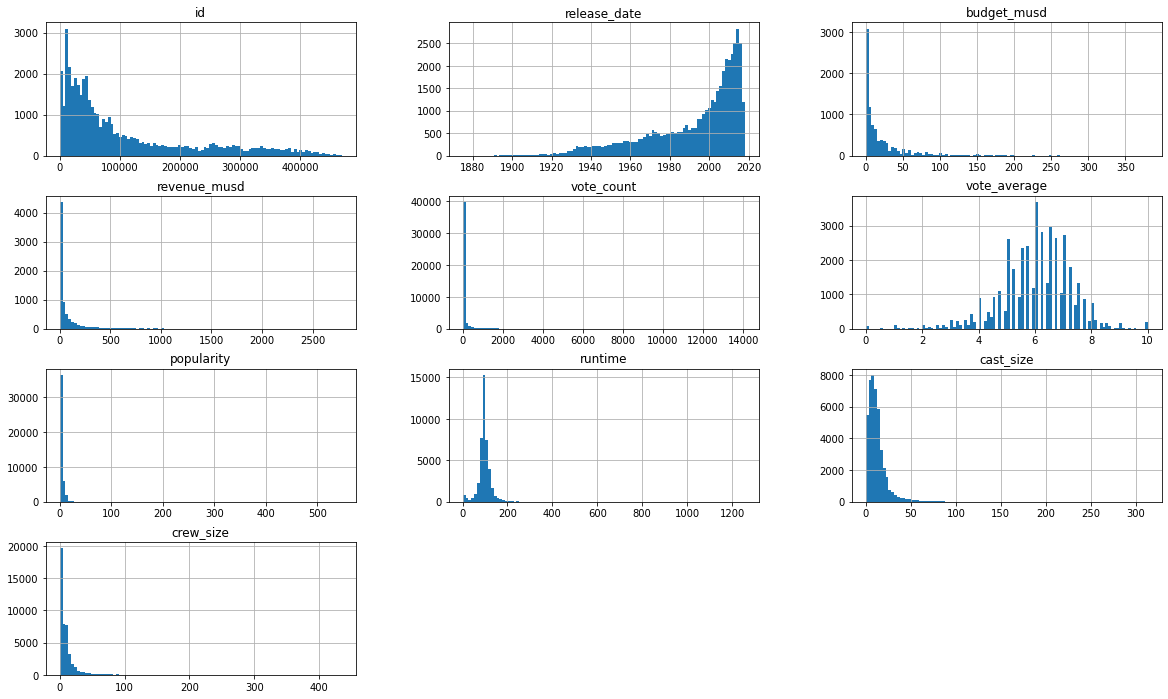

In [7]:
movies_df.hist(figsize=(20,12), bins=100)
plt.show()

Movie Budget Count

In [8]:
movies_df['budget_musd'].value_counts(dropna=False).head(20)

NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64

Movies Revenue Count

In [9]:
movies_df['revenue_musd'].value_counts(dropna=False).head(20)

NaN      37306
12.00       20
10.00       19
11.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
14.00       12
7.00        11
3.00        10
1.00        10
20.00       10
0.00         9
1.50         9
4.00         9
30.00        8
4.10         8
Name: revenue_musd, dtype: int64

In [11]:
movies_df.vote_average.value_counts(dropna = False)

NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.60       1
9.80       1
0.70       1
1.10       1
Name: vote_average, Length: 93, dtype: int64

In [12]:
movies_df.vote_count.value_counts()

1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
2755.00       1
1187.00       1
4200.00       1
3322.00       1
2712.00       1
Name: vote_count, Length: 1820, dtype: int64

Summary Statistics on Categorical Columns

In [13]:
movies_df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


## What are the Best and the Worse Movies?

In [15]:
from IPython.display import HTML
pd.options.display.max_colwidth = 200

In [16]:
# Extract the columns that are relevant for analysis
best_movies_df = movies_df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
best_movies_df

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00


In [17]:
# Calculating Profit of movies
best_movies_df["profit_musd"] = movies_df.revenue_musd.sub(movies_df.budget_musd)

In [18]:
# Calculating the return on investments of each movie
best_movies_df["roi"] = movies_df.revenue_musd.div(movies_df.budget_musd)

In [19]:
best_movies_df

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [20]:
# Rename the columns for presentation purposes
best_movies_df.columns = ["", "Title", "Budget", "Revenue", "Votes", 
                   "Average Rating", "Popularity", "Profit", "ROI"]

In [21]:
# Set the index of the df to be the Movie Title
best_movies_df.set_index('Title', inplace=True)
best_movies_df

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,NaN,NaN,6.00,3.80,0.90,NaN,NaN


Display a subset of movies with their respective movie picture

In [22]:
subset = best_movies_df.iloc[:5, :2]
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,NaN


In [23]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,NaN
Waiting to Exhale,,16.00
Father of the Bride Part II,,NaN


Which Movies Have The Highest Average Rating?

In [24]:
best_movies_df.sort_values(by="Average Rating", ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2YxgYSJTcloGTHAA9ogOVq7M.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,0.32,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifPBA4AjRQWxgVJAwSwWp6nFCa.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,0.04,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOcmIjI8sx9RZIsVgOlq4kQgJ4.jpg' style='height:100px;'>,NaN,NaN,1.00,10.00,1.78,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH5tKdJa3y5jqAQM1eYmkXbHX.jpg' style='height:100px;'>,NaN,NaN,2.00,10.00,0.48,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78kYBNFIJ1HhZ2DoDf3MyN0ca.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.00,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX3BwSpd3WzNgMh9UbIuKprBZ.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.09,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4ykkIVDmrYgUjDld9i0aulMq.jpg' style='height:100px;'>,NaN,NaN,0.00,NaN,0.01,NaN,NaN


Which Movies Have the Highest ROI?

In [25]:
best_movies_df.sort_values(by="ROI", ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0ZhAxOR2RgxGnOkeKoKb2mFM.jpg' style='height:100px;'>,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoiKOEjxBBW0AgDGQWrlfGQ90w.jpg' style='height:100px;'>,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGVw8AdnUJ3xNaZ5iipfsv2e5.jpg' style='height:100px;'>,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflxxk94TjmjMdotXnajh64iMad.jpg' style='height:100px;'>,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne9mfUcL8QCGxF891LWa7lZNI.jpg' style='height:100px;'>,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,NaN,NaN,6.00,3.80,0.90,NaN,NaN


The above analysis doesn't make sense as for the **Highest Rating** Movies, the number of votes are only 1. As for ROI, the budget for the movies are $0, which would cause the ROI to have extremely high values. Therefore, we need to take into account the movies with a certain budget (e.g. Budget >= 5 million) to filter out the movies that have an actual budget.

In [26]:
# Sorting movies based on highest ROI with a minimum budget of 5 million
best_movies_df.loc[best_movies_df.Budget >= 5].sort_values(by = "ROI", ascending = False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfkE3HSH1NOyy1ftxlPw2l3ukb.jpg' style='height:100px;'>,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2GJqWS9Ro4JdfV6FP87v3etE.jpg' style='height:100px;'>,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg' style='height:100px;'>,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xcqSFfT6F7ZXHxowjxfG0yisT.jpg' style='height:100px;'>,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwOZXU7ddSrWE3ryOQM8sIg1sZ.jpg' style='height:100px;'>,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjpyUE8hhseOrCo7vb5myBk03j.jpg' style='height:100px;'>,7.50,NaN,3.00,4.00,0.88,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APLVpsGzXPJw16ZuBtXICxq8B9.jpg' style='height:100px;'>,34.00,NaN,67.00,7.30,9.80,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVBQQ28PRwWELnvvKr7LSPfbTP.jpg' style='height:100px;'>,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [27]:
# Fill missing values of Budget and Votes with 0 (instead of NaN)
best_movies_df.Budget.fillna(0, inplace = True)
best_movies_df.Votes.fillna(0, inplace = True)

In [28]:
best_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [30]:
# Define a function to filter the Best or Worse movies based on specified criteria
def best_worst_movies(df: pd.DataFrame, n: int, by: str, ascending: bool = False, min_bud: int = 0, min_votes: int = 0):
    """Returns the Best or Worse movie based on specified arguments.

    Args:
        df (pd.DataFrame): The DataFrame to filter the Best or Worse movies.
        n (int): Number of rows to return.
        by (str): Column names to filter the Best or Worse movies.
        ascending (bool, optional): Specify sorting by ascending or descending order. Defaults to False.
        min_bud (int, optional): Minimum budget of movie to filter. Defaults to 0.
        min_votes (int, optional): Minimum votes of movie to filter. Defaults to 0.

    Returns:
        pd.DataFrame: DataFrame containing the Best or Worse movies.
    """
    
    df2 = df.loc[(df.Budget >= min_bud) & (df.Votes >= min_votes), 
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

Top 5 Movies - Highest Revenue

In [31]:
best_worst_movies(df=best_movies_df, n=5, by="Revenue")

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


Top 5 Movies - Highest Budget

In [32]:
best_worst_movies(df=best_movies_df, n=5, by="Budget")

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


Top 5 Movies - Highest Profit

In [33]:
best_worst_movies(df=best_movies_df, n=5, by="Profit")

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


Top 5 Movies - Lowest Profit

In [34]:
best_worst_movies(df=best_movies_df, n=5, by="Profit", ascending=True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


Top 5 Movies - Highest ROI

In [35]:
best_worst_movies(df=best_movies_df, n=5, by="ROI", min_bud=50)

,,ROI
Title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


Top 5 Movies - Lowest ROI

In [36]:
best_worst_movies(df=best_movies_df, n=5, by="ROI", ascending=True, min_bud=100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


Top 5 Movies - Most Votes 

In [37]:
best_worst_movies(df=best_movies_df, n=5, by="Votes")

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


Top 5 Movies - Highest Rating

In [38]:
best_worst_movies(df=best_movies_df, n=5, by="Average Rating", min_votes=50)

,,Average Rating
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


Top 5 Movies - Lowest Rating

In [39]:
best_worst_movies(df=best_movies_df, n=5, by="Average Rating", ascending=True, min_votes=100)

,,Average Rating
Title,,
House of the Dead,,2.80
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


In [40]:
best_worst_movies(df=best_movies_df, n=5, by="Average Rating", ascending=True, min_votes=20, min_bud=20)

,,Average Rating
Title,,
Foodfight!,,2.30
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


Top 5 Movies - Most Popular

In [41]:
best_worst_movies(df=best_movies_df, n=5, by="Popularity")

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Movie Recommendations

Search 1: Movies based on Science Fiction Action Movie with Bruce Willis and have a High Rating

In [43]:
# Genres Column
movies_df[['genres']].head()

,genres
0,Animation|Comedy|Family
1,Adventure|Fantasy|Family
2,Romance|Comedy
3,Comedy|Drama|Romance
4,Comedy


In [44]:
# Create DF Mask of movies with Action & Science Fiction Genres
mask_genres = movies_df.genres.str.contains("Action") & movies_df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [45]:
# Movies Cast Column
movies_df[['cast']].head()

,cast
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
3,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
4,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan


In [46]:
# Create a DF Mask of movies with Bruce Willis as a cast
mask_actor = movies_df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [50]:
# Narrow down on movies with both masking conditions fulfilled and sorting the movies by their vote_average values
recommended_movies = movies_df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by="vote_average", ascending=False).set_index("title")

In [51]:
HTML(recommended_movies.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40
Vice,,4.10


Search 2: Movies with Uma Thurman and Directed by Quentin Tarantino with a Low Runtime

In [56]:
movies_df[['director']].head()

,director
0,John Lasseter
1,Joe Johnston
2,Howard Deutch
3,Forest Whitaker
4,Charles Shyer


In [57]:
# Create a mask for director
mask_director = movies_df.director == "Quentin Tarantino"

In [58]:
# Create a mask for movies with Uma Thurman as a cast
mask_actor = movies_df.cast.str.contains("Uma Thurman")

In [59]:
quentin = movies_df.loc[mask_director & mask_actor, 
               ["title", "poster_path", "runtime"]].sort_values(by="runtime").set_index("title")

In [60]:
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


Search 3: Most Successful Pixar Studio Movies between years 2010 and 2015 with the Highest Revenue

In [61]:
movies_df[['production_companies']]

,production_companies
0,Pixar Animation Studios
1,TriStar Pictures|Teitler Film|Interscope Communications
2,Warner Bros.|Lancaster Gate
3,Twentieth Century Fox Film Corporation
4,Sandollar Productions|Touchstone Pictures
...,...
44686,NaN
44687,Sine Olivia
44688,American World Pictures
44689,Yermoliev


In [62]:
mask_studio = movies_df.production_companies.str.contains("Pixar").fillna(False)

In [63]:
mask_time = movies_df.release_date.between("2010-01-01", "2015-12-31")

In [64]:
pixar = movies_df.loc[mask_studio & mask_time, 
               ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [65]:
HTML(pixar.to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.97,2010-06-16
Inside Out,,857.61,2015-06-09
Monsters University,,743.56,2013-06-20
Cars 2,,559.85,2011-06-11
Brave,,538.98,2012-06-21
The Good Dinosaur,,331.93,2015-11-14
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


Search 4: Most Recent Action or Thriller Movies with Original Language English and Minimum Rating of 7.5

In [66]:
mask_genre = movies_df.genres.str.contains("Action") | movies_df.genres.str.contains("Thriller")

In [68]:
mask_lan = movies_df.original_language == "en"

In [69]:
mask_vote_av = movies_df.vote_average >= 7.5 

In [70]:
mask_vote_co = movies_df.vote_count >= 10

In [71]:
next_mov = movies_df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
               ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title").head(20)

In [72]:
HTML(next_mov.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28
The Thinning,,Thriller,7.60,92.00,2016-10-12
11.22.63,,Drama|History|Thriller,8.00,213.00,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.50,7993.00,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.80,12.00,2015-11-09


## What are the Most Common Words in Movie Titles and Taglines?

In [73]:
from wordcloud import WordCloud

In [74]:
movies_df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming t...",English,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, ...",English,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home...",English,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan,12,7,Charles Shyer


In [75]:
# Drop missing values from Title, Tagline and Overview
title = movies_df.title.dropna()
overview = movies_df.overview.dropna()
tagline = movies_df.tagline.dropna()

In [76]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [79]:
# Join all the strings together to form a corpus
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [80]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

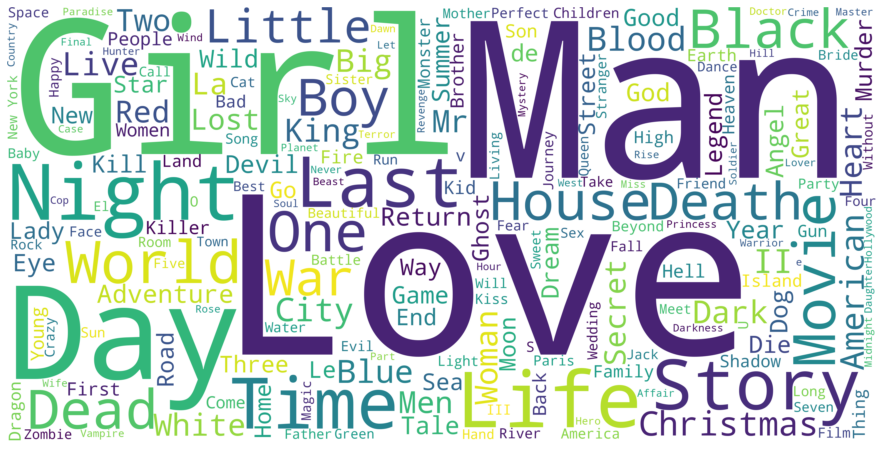

In [81]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

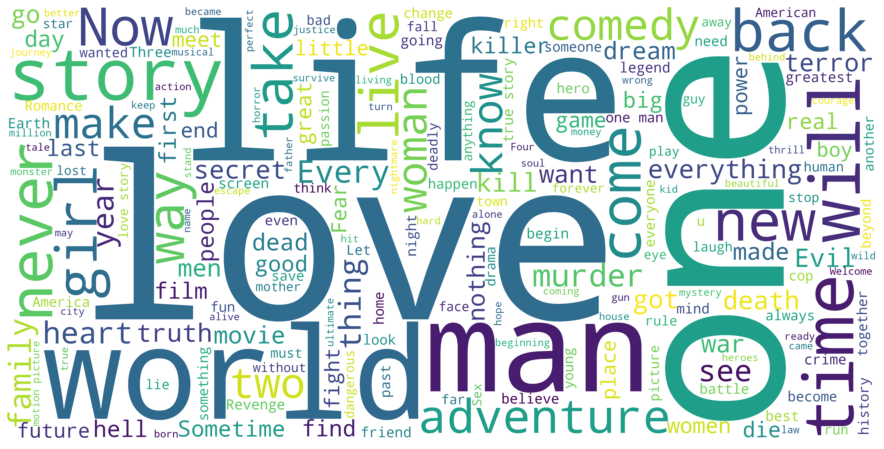

In [82]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

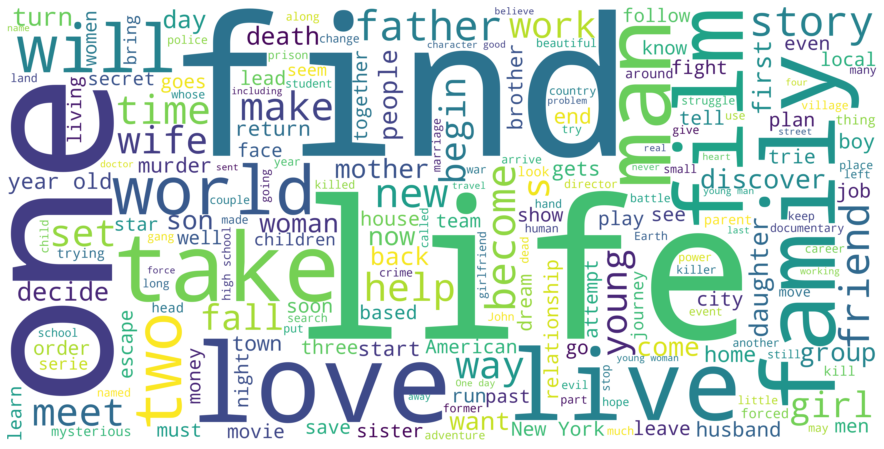

In [83]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises More Successful?

In [84]:
movies_df[['belongs_to_collection']].head()

,belongs_to_collection
0,Toy Story Collection
1,NaN
2,Grumpy Old Men Collection
3,NaN
4,Father of the Bride Collection


In [85]:
movies_df["Franchise"] = movies_df.belongs_to_collection.notna()

In [86]:
movies_df.Franchise.value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

Franchise vs Stand-Alone: Average Revenue

In [87]:
movies_df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

Franchise vs Stand-Alone: Return on Investment (ROI)

In [88]:
movies_df["ROI"] = movies_df.revenue_musd.div(movies_df.budget_musd)

In [89]:
movies_df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

Franchise vs Stand-Alone: Average Budget

In [90]:
movies_df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

Franchise vs Stand-Alone: Average Popularity

In [91]:
movies_df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

Franchise vs Stand-Alone: Average Rating

In [92]:
movies_df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [93]:
movies_df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


## Most Successful Franchises

In [94]:
movies_df[['belongs_to_collection']].head()

,belongs_to_collection
0,Toy Story Collection
1,NaN
2,Grumpy Old Men Collection
3,NaN
4,Father of the Bride Collection


In [95]:
movies_df['belongs_to_collection'].value_counts()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [96]:
franchises = movies_df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [97]:
franchises.head()

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00

In [98]:
franchises.nlargest(20, ("title", "count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [99]:
franchises.nlargest(20, ("revenue_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Avatar Collection                       1      237.00 237.00      2787.97   
The Avengers Collection                 2      500.00 250.00      2924.96   
Frozen Collection                       2      150.00 150.00      1274.22   
Finding Nemo Collection                 2      294.00 147.00      1968.91   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
Despicable Me Collection                6      299.00  74.75      3691.07   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
The Secret Life of Pets Collection      1       75.00  75.00       875.46   
Transformers Collection                 5      965.00 193.00      4366.10   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Wonder Woman Collection                 1      149.00 149.00       820.58   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Fantastic Beasts Collection             1      180.00 180.00       809.34   
Iron Man Collection                     3      540.00 180.00      2424.55   
The Lion King Collection                4       45.00  45.00       788.24   
Deadpool Collection                     1       58.00  58.00       783.11   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Avatar Collection                   2787.97         7.20     185.07  11.76   
The Avengers Collection             1462.48         7.35      63.63   5.96   
Frozen Collection                   1274.22         7.10      16.88   8.49   
Finding Nemo Collection              984.45         7.20      19.99   7.57   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.38      23.41   8.24   
Despicable Me Collection             922.77         6.78     106.72  12.76   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
The Secret Life of Pets Collection   875.46         5.90      11.01  11.67   
Transformers Collection              873.22         6.14      14.43   5.20   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Wonder Woman Collection              820.58         7.20     294.34   5.51   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Fantastic Beasts Collection          809.34         7.20      41.05   4.50   
Iron Man Collection                  808.18         6.93      21.63   4.18   
The Lion King Collection             788.24         6.75      11.48  17.52   
Deadpool Collection                  783.11         7.40     187.86  13.50   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Avatar Collection                     12114.00  
The Avengers Collection                9454.00  
Frozen Collection                      3035.00  
Finding Nemo Collection                5312.50  
The Hobbit Collection                  5981.33  
The Lord of the Rings Collection       8253.00  
Harry Potter Collection     

In [100]:
franchises.nlargest(20, ("budget_musd", "mean"))

title budget_musd        revenue_musd  \
                                        count         sum   mean          sum   
belongs_to_collection                                                           
Tangled Collection                          2      260.00 260.00       591.79   
Pirates of the Caribbean Collection         5     1250.00 250.00      4521.58   
The Avengers Collection                     2      500.00 250.00      2924.96   
The Hobbit Collection                       3      750.00 250.00      2935.52   
Man of Steel Collection                     2      475.00 237.50      1536.11   
Avatar Collection                           1      237.00 237.00      2787.97   
The Amazing Spider-Man Collection           2      415.00 207.50      1457.93   
World War Z Collection                      1      200.00 200.00       531.87   
Spider-Man Collection                       3      597.00 199.00      2496.35   
The Dark Knight Collection                  3      585.00 195.00      2463.72   
Transformers Collection                     5      965.00 193.00      4366.10   
Captain America Collection                  3      560.00 186.67      2238.64   
The Chronicles of Narnia Collection         3      560.00 186.67      1584.14   
Alice in Wonderland Collection              2      370.00 185.00      1324.86   
Guardians of the Galaxy Collection          2      370.00 185.00      1636.74   
Fantastic Beasts Collection                 1      180.00 180.00       809.34   
Iron Man Collection                         3      540.00 180.00      2424.55   
Pacific Rim Collection                      1      180.00 180.00       407.60   
Star Trek: Alternate Reality Collection     3      525.00 175.00      1196.52   
Cars Collection                             3      495.00 165.00      1372.01   

                                                vote_average popularity  \
                                           mean         mean       mean   
belongs_to_collection                                                     
Tangled Collection                       591.79         7.25      12.32   
Pirates of the Caribbean Collection      904.32         6.88      53.97   
The Avengers Collection                 1462.48         7.35      63.63   
The Hobbit Collection                    978.51         7.23      25.21   
Man of Steel Collection                  768.05         6.10      24.99   
Avatar Collection                       2787.97         7.20     185.07   
The Amazing Spider-Man Collection        728.97         6.50      28.67   
World War Z Collection                   531.87         6.70      26.11   
Spider-Man Collection                    832.12         6.47      22.62   
The Dark Knight Collection               821.24         7.80      57.42   
Transformers Collection                  873.22         6.14      14.43   
Captain America Collection               746.21         7.10      61.31   
The Chronicles of Narnia Collection      528.05         6.40      14.34   
Alice in Wonderland Collection           662.43         6.45      15.95   
Guardians of the Galaxy Collection       818.37         7.75     119.31   
Fantastic Beasts Collection              809.34         7.20      41.05   
Iron Man Collection                      808.18         6.93      21.63   
Pacific Rim Collection                   407.60         6.70      33.95   
Star Trek: Alternate Reality Collection  398.84         7.13      17.27   
Cars Collection                          457.34         6.33      17.25   

                                           ROI vote_count  
                                        median       mean  
belongs_to_collection                                      
Tangled Collection                        2.28    1901.00  
Pirates of the Caribbean Collection       3.45    5016.00  
The Avengers Collection                   5.96    9454.00  
The Hobbit Collection                     3.83    5981.33  
Man of Steel Collection       

In [101]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(20, ("vote_average", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.38      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        

## Most Successful Directors

In [102]:
movies_df[['director']].head()

,director
0,John Lasseter
1,Joe Johnston
2,Howard Deutch
3,Forest Whitaker
4,Charles Shyer


In [103]:
movies_df.director.value_counts().head(20)

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: director, dtype: int64

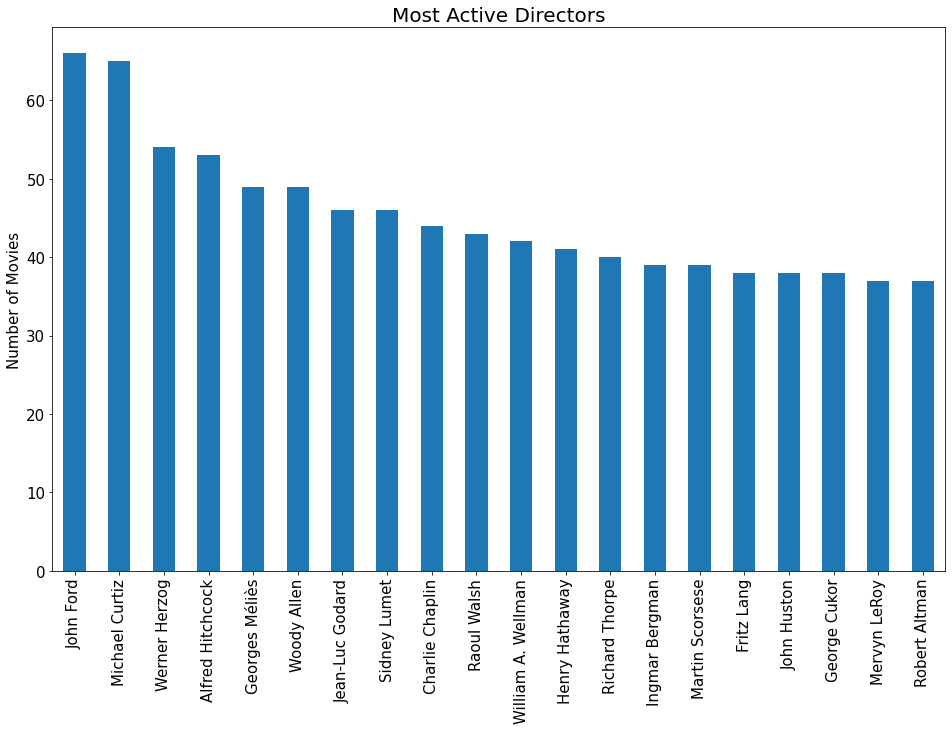

In [104]:
plt.figure(figsize = (16, 10))
movies_df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [105]:
movies_df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

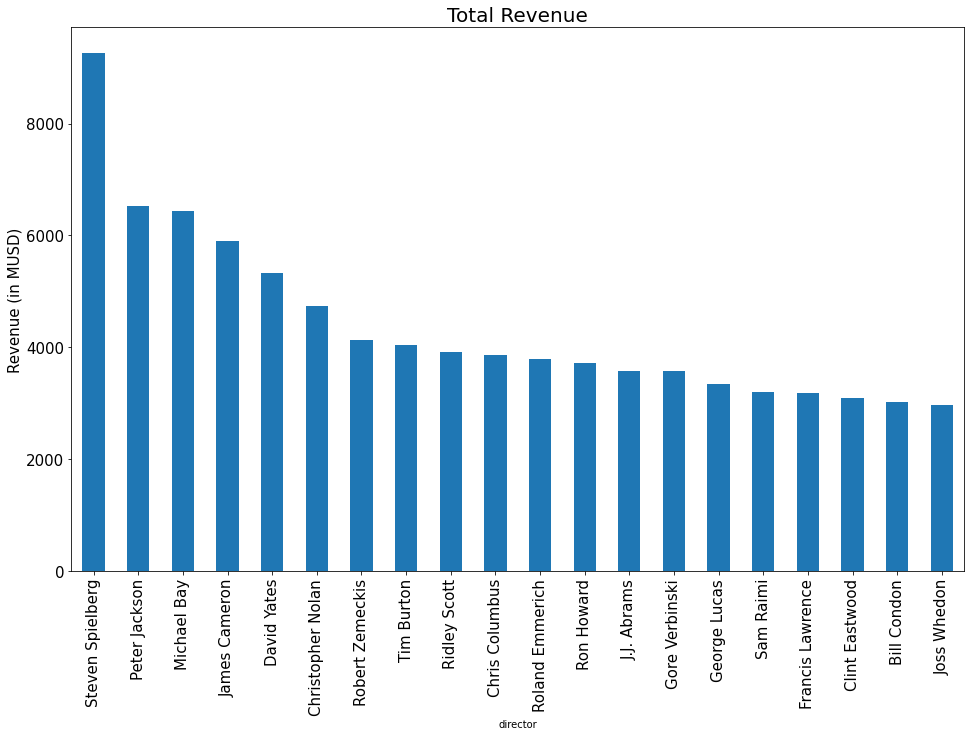

In [106]:
plt.figure(figsize = (16, 10))
movies_df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [107]:
directors = movies_df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [108]:
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [109]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Martin Scorsese,39,7.22,35541.00
Peter Jackson,13,7.14,47571.00
Joel Coen,17,7.02,18139.00
James Cameron,11,6.93,33736.00


In [110]:
movies_df.genres = movies_df.genres.astype(str)

In [111]:
movies_df.loc[movies_df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors

In [112]:
movies_df[['cast']].head()

,cast
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
2,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
3,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
4,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan


In [113]:
movies_df.set_index("id", inplace=True)

In [114]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13

In [115]:
# Split the cast column into the various actors and store it in an actors df
actors = movies_df.cast.str.split("|", expand=True)
actors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [116]:
actors = actors.stack().reset_index(level=1, drop=True).to_frame()
actors

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [117]:
actors.columns = ['Actor']

In [118]:
# Merge with Original DF
actors = actors.merge(movies_df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [119]:
actors

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


In [120]:
actors['Actor'].nunique()

201501

In [121]:
actors['Actor'].unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [122]:
actors.Actor.value_counts().head(20)

Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: Actor, dtype: int64

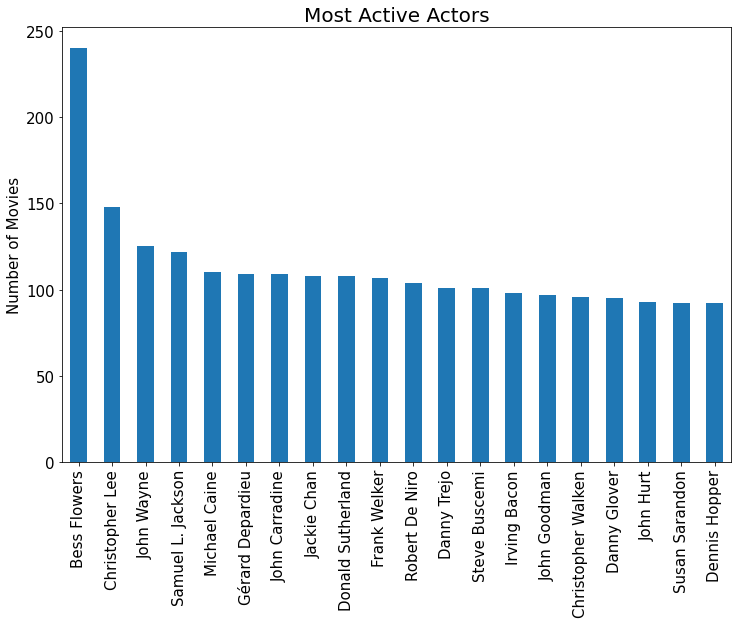

In [123]:
plt.figure(figsize = (12, 8))
actors.Actor.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Actors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()

In [124]:
agg = actors.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [125]:
agg

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
\tCheung Chi-Sing,0.00,NaN,5.90,3.05,1
\tDouglas Hegdahl,0.00,NaN,4.00,0.15,1
\tRobert Osth,0.00,NaN,6.00,1.81,1
\tYip Chun,0.00,NaN,6.75,1.80,2
Jorge de los Reyes,0.00,NaN,8.10,3.47,1
...,...,...,...,...,...
长泽雅美,0.35,0.35,6.40,2.82,11
陳美貞,83.06,83.06,7.00,6.49,1
高桥一生,333.11,166.55,6.74,9.10,8


In [126]:
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [127]:
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


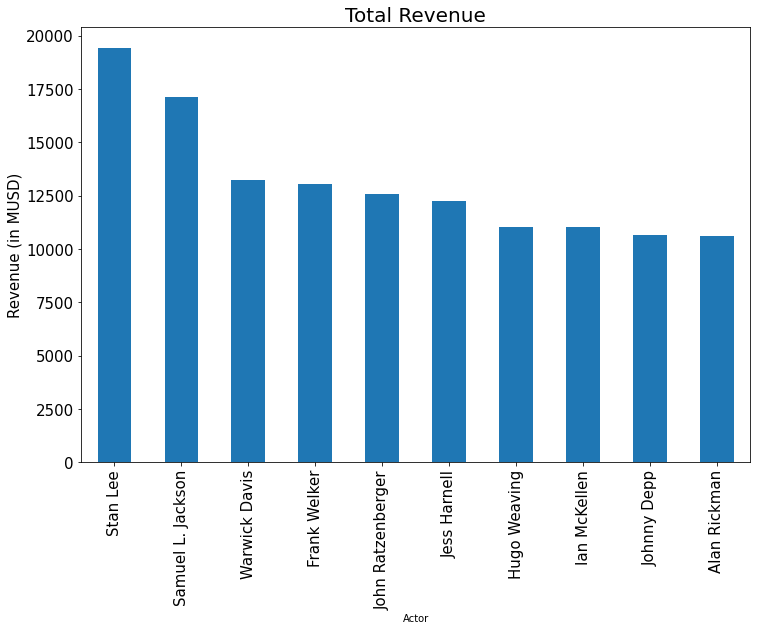

In [128]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.show()

In [132]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10


In [133]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Rating")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Masao Hayama,0.00,NaN,8.84,0.32,10
David Attenborough,0.00,NaN,8.27,2.15,11
Emil Jannings,0.00,NaN,7.78,1.70,10
Halit Akçatepe,0.21,0.21,7.78,0.74,10
Yo Oizumi,511.21,102.24,7.72,7.51,13
Şener Şen,11.07,3.69,7.69,0.91,16
Ayşen Gruda,0.91,0.46,7.68,0.74,10
Akira Tani,0.33,0.16,7.65,5.04,12
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


In [134]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Goran D. Kleut,2568.94,366.99,6.00,42.32,10
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Joseph Oliveira,3543.44,354.34,7.64,34.45,10
